In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [4]:
# Directory with our training bad pictures
train_bad_dir = os.path.join('C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/train/bad')

# Directory with our training good pictures
train_good_dir = os.path.join('C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/train/good')

# Directory with our validation bad pictures
valid_bad_dir = os.path.join('C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/valid/bad')

# Directory with our validation good pictures
valid_good_dir = os.path.join('C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/valid/good')

In [5]:
print('total training bad images:', len(os.listdir(train_bad_dir)))
print('total training good images:', len(os.listdir(train_good_dir)))
print('total validation bad images:', len(os.listdir(valid_bad_dir)))
print('total validation good images:', len(os.listdir(valid_good_dir)))

total training bad images: 530
total training good images: 530
total validation bad images: 108
total validation good images: 114


['plot_0 - Kopie (2).png', 'plot_0 - Kopie (3).png', 'plot_0 - Kopie (4).png', 'plot_0 - Kopie (5).png', 'plot_0 - Kopie (6).png', 'plot_0 - Kopie (7).png', 'plot_0 - Kopie (8).png', 'plot_0 - Kopie (9).png', 'plot_0 - Kopie.png', 'plot_0.png']
['plot_1 - Kopie (2).png', 'plot_1 - Kopie (3).png', 'plot_1 - Kopie (4).png', 'plot_1 - Kopie (5).png', 'plot_1 - Kopie (6).png', 'plot_1 - Kopie (7).png', 'plot_1 - Kopie (8).png', 'plot_1 - Kopie (9).png', 'plot_1 - Kopie.png', 'plot_1.png']
['plot_10 - Kopie (2).png', 'plot_10 - Kopie (3).png', 'plot_10 - Kopie (4).png', 'plot_10 - Kopie (5).png', 'plot_10 - Kopie.png', 'plot_10.png', 'plot_101 - Kopie (2).png', 'plot_101 - Kopie (3).png', 'plot_101 - Kopie (4).png', 'plot_101 - Kopie (5).png']
['plot_121 - Kopie (2).png', 'plot_121 - Kopie (3).png', 'plot_121 - Kopie (4).png', 'plot_121 - Kopie (5).png', 'plot_121 - Kopie.png', 'plot_121.png', 'plot_125 - Kopie (2).png', 'plot_125 - Kopie (3).png', 'plot_125 - Kopie (4).png', 'plot_125 - Ko

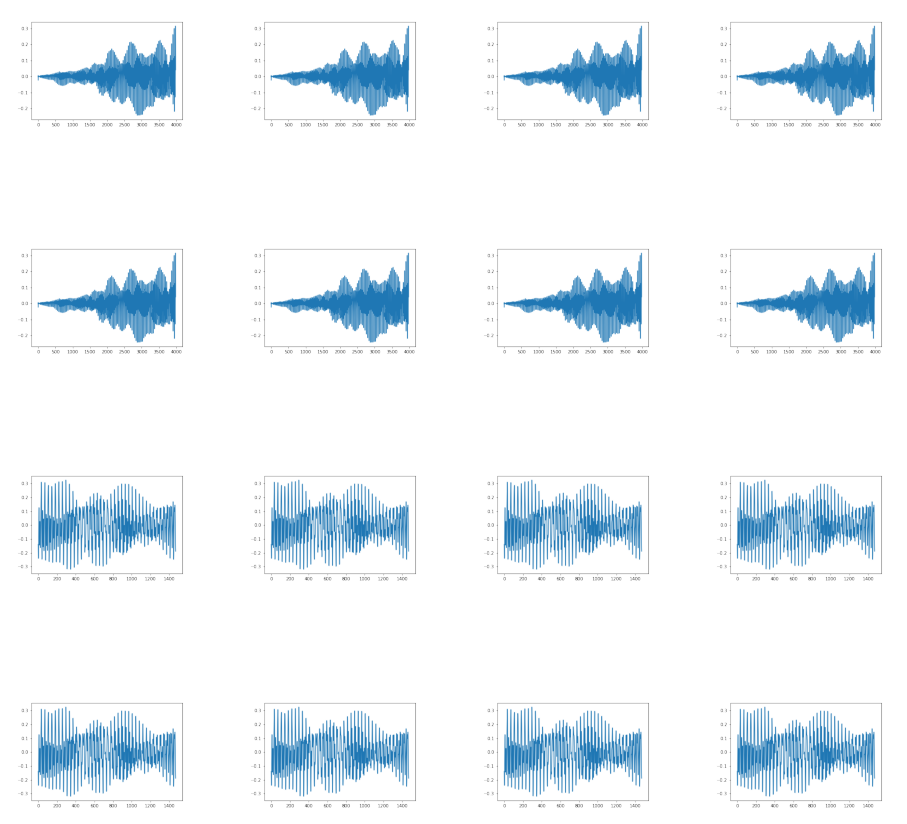

In [6]:
train_bad_names = os.listdir(train_bad_dir)
print(train_bad_names[:10])

train_good_names = os.listdir(train_good_dir)
print(train_good_names[:10])

validation_bad_hames = os.listdir(valid_bad_dir)
print(validation_bad_hames[:10])

validation_good_names = os.listdir(valid_good_dir)
print(validation_good_names[:10])

%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_bad_pic = [os.path.join(train_bad_dir, fname)
                for fname in train_bad_names[pic_index-8:pic_index]]
next_good_pic = [os.path.join(train_good_dir, fname)
                for fname in train_good_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_bad_pic + next_good_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/train/',  # This is the source directory for training images
        classes = ['bad', 'good'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/valid/',  # This is the source directory for training images
        classes = ['bad', 'good'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 1060 images belonging to 2 classes.
Found 222 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 6s 673ms/step - loss: 54.2486 - accuracy: 0.5266 - val_loss: 24.5223 - val_accuracy: 0.2895
Epoch 2/15
8/8 [==============================] - 2s 293ms/step - loss: 25.1862 - accuracy: 0.5128 - val_loss: 8.4284 - val_accuracy: 0.5132
Epoch 3/15
8/8 [==============================] - 2s 283ms/step - loss: 5.1717 - accuracy: 0.7266 - val_loss: 6.2565 - val_accuracy: 0.7105
Epoch 4/15
8/8 [==============================] - 2s 289ms/step - loss: 1.4062 - accuracy: 0.9000 - val_loss: 6.8992 - val_accuracy: 0.7500
Epoch 5/15
8/8 [==============================] - 2s 285ms/step - loss: 1.0393 - accuracy: 0.9125 - val_loss: 6.0581 - val_accuracy: 0.7895
Epoch 6/15
8/8 [==============================] - 2s 293ms/step - loss: 0.7105 - accuracy: 0.9266 - val_loss: 5.9310 - val_accuracy: 0.7105
Epoch 7/15
8/8 [==============================] - 2s 284ms/step - loss: 0.5437 - accuracy: 0.9340 - val_loss: 5.6106 - val_accuracy: 0.7500
Epoch 8/15
8/8 [=

In [10]:
model.evaluate(validation_generator)

12/12 [==============================] - 1s 47ms/step - loss: 5.8096 - accuracy: 0.7027


[5.809620380401611, 0.7027027010917664]

12/12 [==============================] - 0s 35ms/step


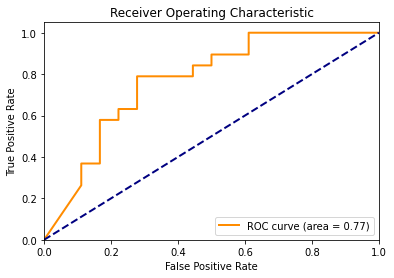

In [11]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 0s 24ms/step
[1.]
C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/upload/test.png is good


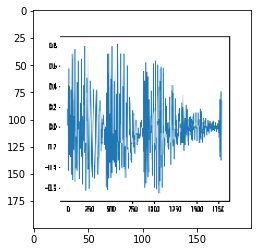

In [15]:
path = 'C:/Users/hennm/PycharmProjects/ebeat/playground/mh361/Challenge 3/tmp/upload/test.png'
img = tf.keras.preprocessing.image.load_img(path, target_size=(200, 200))
x = tf.keras.preprocessing.image.img_to_array(img)
plt.imshow(x / 255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0] < 0.5:
    print(path + " is bad")
else:
    print(path + " is good")

In [14]:
images.shape

(1, 200, 200, 3)